# 2 - Projections et recherches - Corrigé

Nous savons importer une table et la trier.

Comment extraire des données (ligne sou colonnes) efficacement ?

## Les données

On travaille désormais avec le fichier ``marvel-data.csv``. Ce fichier contient les champs suivants :
* name : le nom du personnage
* ID : son identité (secrète, publique...)
* ALIGN : son côté (gentil, méchant...)
* EYE : la couleur des yeux
* HAIR : la couleur des cheveux
* SEX : le sexe
* ALIVE : est-il en vie ?
* APPEARANCES : le nombre d'apparitions (-1 si non fourni)
* FIRST APPEARANCE : la date de 1ère apparition
* Year : l'année de première apparition

Ces données ont été agrégées afin de [tester](https://fivethirtyeight.com/features/women-in-comic-books/) le caractère sexiste des comics américains.

Importons les données :

In [2]:
heros = []

with open("marvel.csv", "r") as fichier :
    cles = fichier.readline().strip().split(";")
    for ligne in fichier :
        valeurs = ligne.strip().split(";")
        dico = dict()
        for cle, valeur in zip(cles, valeurs) :
            if cle not in ["APPEARANCES", "Year"] :
                dico[cle] = valeur
            else :
                dico[cle] = int(valeur)
        heros.append(dico)

# On n'affiche que les deux premières lignes
heros[:2]

[{'name': 'Spider-Man (Peter Parker)',
  'ID': 'Secret Identity',
  'ALIGN': 'Good Characters',
  'EYE': 'Hazel Eyes',
  'HAIR': 'Brown Hair',
  'SEX': 'Male Characters',
  'ALIVE': 'Living Characters',
  'APPEARANCES': 4043,
  'FIRST APPEARANCE': 'Aug-62',
  'Year': 1962},
 {'name': 'Captain America (Steven Rogers)',
  'ID': 'Public Identity',
  'ALIGN': 'Good Characters',
  'EYE': 'Blue Eyes',
  'HAIR': 'White Hair',
  'SEX': 'Male Characters',
  'ALIVE': 'Living Characters',
  'APPEARANCES': 3360,
  'FIRST APPEARANCE': 'mars-41',
  'Year': 1941}]

## Projections

Comment ne garder que certaines colonnes ? On va créer une liste en ne recopiant que les colonnes nous intéressant.

In [3]:
def projection(liste, champs):
    """
    Crée une liste de dictionnaire en ne copiant que les champs dans la liste champs
    liste est une liste donc chaque élément est un dictionnaire
    champs est une liste dont les éléments sont les champs à conserver
    Retourne la nouvelle liste
    
    >>> projection(heros, ["SEX", "APPEARANCE"])
    """
    
    assert len(liste) > 0 , "La liste doit être non vide"
    assert len(champs) > 0, "La liste des champs doit être non vide"
    
    retour = []
    
    for ligne in liste :
        dico = dict()
        for cle in ligne :
            if cle in champs :
                dico[cle] = ligne[cle]
        retour.append(dico)
    
    return retour

Un essai en ne gardant que le sexe et le nombre d'appartions :

In [4]:
sexe_apparitions = projection(heros, ["SEX", "APPEARANCES"])

sexe_apparitions[:2]

[{'SEX': 'Male Characters', 'APPEARANCES': 4043},
 {'SEX': 'Male Characters', 'APPEARANCES': 3360}]

1. Simplifier le tableau en ne gardant que que la couleur des yeux, le sexe et l'année d'apparition

In [5]:
# Votre code
yeux_sexe_apparitions = projection(heros, ["EYE", "SEX", "APPEARANCES"])

yeux_sexe_apparitions[:2]

[{'EYE': 'Hazel Eyes', 'SEX': 'Male Characters', 'APPEARANCES': 4043},
 {'EYE': 'Blue Eyes', 'SEX': 'Male Characters', 'APPEARANCES': 3360}]

2. Ecrire une fonction ``anti_projection`` qui fonctionne à l'inverse de la précédente : elle prend en argument la liste et les champs que l'on ne souhaite __pas__ garder.

In [6]:
# Votre code
def anti_projection(liste, champs):
    """
    Crée une liste de dictionnaire en ne copiant que les champs qui ne sont pas dans la liste champs
    liste est une liste donc chaque élément est un dictionnaire
    champs est une liste dont les éléments sont les champs à NE PAS conserver
    Retourne la nouvelle liste
    
    >>> anti_projection(heros, ["SEX", "APPEARANCE"])
    """
    
    assert len(liste) > 0 , "La liste doit être non vide"
    assert len(champs) > 0, "La liste des champs doit être non vide"
    
    retour = []
    
    for ligne in liste :
        dico = dict()
        for cle in ligne :
            if cle not in champs :
                dico[cle] = ligne[cle]
        retour.append(dico)
    
    return retour

3. Tester votre fonction à l'aide du test suivant :

In [7]:
projection(heros, ["name","ID","ALIGN","EYE","HAIR","SEX","ALIVE"]) == anti_projection(heros, ["APPEARANCES","FIRST APPEARANCE","Year"])

True

## Recherches

4. Utiliser une liste par compréhension afin d'extraire les lignes des personnages féminins. Vous devez en avoir 3628.

In [8]:
#Votre code
feminins = [ligne for ligne in heros if ligne["SEX"] == "Female Characters"]

In [9]:
len(feminins)

3628

5. Faites de même afin d'extraire les lignes des personnages masculins apparus avant 2000 (au sens strict). Vous devez en avoir 8385.

In [10]:
#Votre code
masculins_avant_2000 = [ligne for ligne in heros if ligne["SEX"] == "Male Characters" and ligne["Year"] < 2000]

In [11]:
len(masculins_avant_2000)

8385

Ne peut-on pas formaliser les choses ? En utilisant une fonction de recherche ?

In [12]:
def recherche(liste, condition) :
    """
    Cherche les lignes de la liste vérifiant la condition donnée
    liste est une liste de dictionnaires
    condition est une condition Python fournie sous forme de chaîne de caractère et portant sur la variable ligne
    et les clés du dictionnaire
    Retourne une liste avec les seules lignes satisfaisant la clé
    
    >>> recherche(heros, 'ligne["SEX"] == "Male Characters"')
    """
    
    return [ligne for ligne in liste if eval(condition)]

On peut ainsi faire (notez les guillemets simples et doubles) :

In [13]:
masculins_avant_2000_bis = recherche(heros, 'ligne["SEX"] == "Male Characters" and ligne["Year"] < 2000')

In [14]:
masculins_avant_2000 == masculins_avant_2000_bis

True

In [15]:
len(masculins_avant_2000)

8385

6. Combien y-a-t'il de personnages masculins ? Féminins ? Autres ??

In [16]:
# Votre code
len(recherche(heros, 'ligne["SEX"] == "Male Characters"'))

11100

In [17]:
# Votre code
len(recherche(heros, 'ligne["SEX"] == "Female Characters"'))

3628

In [18]:
# Votre code
len(recherche(heros, 'ligne["SEX"] != "Female Characters" and ligne["SEX"] != "Male Characters"'))

833

7. Chercher les personnages féminins apparus avant 2000 ? Combien en a-t-on ?

In [19]:
# Votre code
feminins_avant_2000_bis = recherche(heros, 'ligne["SEX"] == "Female Characters" and ligne["Year"] < 2000')

In [20]:
len(feminins_avant_2000_bis)

2387

8. Chercher les personnages féminins aux yeux bleus ? Y-en-a-t'il autant que des hommes aux yeux bleus ?

In [21]:
# Votre code
feminins_bleus = recherche(heros, 'ligne["SEX"] == "Female Characters" and ligne["EYE"] == "Blue Eyes"')
masculins_bleus = recherche(heros, 'ligne["SEX"] == "Male Characters" and ligne["EYE"] == "Blue Eyes"')

In [22]:
len(feminins_bleus)

664

In [23]:
len(masculins_bleus)

1182

9. Combien de personnages masculins ne sont pas gentils (ils ne sont pas forcément méchants...) ?

In [24]:
# Votre code
len(recherche(heros, 'ligne["SEX"] == "Male Characters" and ligne["ALIGN"] != "Good Characters"'))

8298

10. Même question avec les féminins...

In [25]:
# Votre code
len(recherche(heros, 'ligne["SEX"] == "Female Characters" and ligne["ALIGN"] != "Good Characters"'))

2186

## Agrégation de données 

Comment construire le graphique donnant le nombre de personnages masculins apparus chaque année ?

On peut utiliser les dictionnaires :
* On parcourt toutes les lignes du tableau des héros masculins
* On crée un dictionnaire vide
* Si l'année n'a jamais été rencontrée on ajoute une clé correspondante au dictionnaire et on met la valeur à 1
* Si elle a déjà été rencontrée, on incrémente la valeur de 1

In [26]:
masculins = recherche(heros, 'ligne["SEX"] == "Male Characters"')

annees_masculins = dict()

for ligne in masculins :
    if ligne['Year'] in annees_masculins.keys() :
        annees_masculins[ligne['Year']] += 1
    else :
        annees_masculins[ligne['Year']] = 1

11. Faire de même avec les personnages féminins

In [27]:
feminins = recherche(heros, 'ligne["SEX"] == "Female Characters"')

annees_feminins = dict()

for ligne in feminins :
    if ligne['Year'] in annees_feminins.keys() :
        annees_feminins[ligne['Year']] += 1
    else :
        annees_feminins[ligne['Year']] = 1

12. Faire un graphique comparant ces séries. On pourra accéder aux clés et valeurs des dictionnaires grâce à ``keys()`` et ``items``

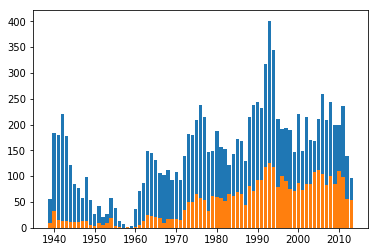

In [33]:
from matplotlib import pyplot as plt

plt.bar(annees_masculins.keys(), annees_masculins.values())
plt.bar(annees_feminins.keys(), annees_feminins.values())

plt.show()

13. Qui est le plus apparu ? Les personnages masculins gentils ? Les masculins méchants ? Les féminins gentils ? Méchants ?

In [32]:
apparitions = dict()

for ligne in heros :
    if (ligne["SEX"], ligne["ALIGN"]) in apparitions.keys() :
        apparitions[(ligne["SEX"], ligne["ALIGN"])] += 1
    else :
        apparitions[(ligne["SEX"], ligne["ALIGN"])] = 1

apparitions

{('Male Characters', 'Good Characters'): 2802,
 ('Male Characters', 'Neutral Characters'): 1358,
 ('Female Characters', 'Good Characters'): 1442,
 ('Female Characters', 'Neutral Characters'): 597,
 ('Male Characters', 'Bad Characters'): 5139,
 ('Genderfluid Characters', 'Neutral Characters'): 1,
 ('Female Characters', 'Bad Characters'): 927,
 ('Agender Characters', 'Neutral Characters'): 11,
 ('Female Characters', ''): 662,
 ('', 'Neutral Characters'): 106,
 ('Male Characters', ''): 1801,
 ('', 'Good Characters'): 112,
 ('', ''): 207,
 ('Agender Characters', 'Bad Characters'): 14,
 ('Agender Characters', 'Good Characters'): 9,
 ('Genderfluid Characters', 'Good Characters'): 1,
 ('', 'Bad Characters'): 370,
 ('Agender Characters', ''): 2}